<a href="https://colab.research.google.com/github/dinanabila/learning/blob/main/python-angela-yu/day074_lego-analysis/day074_Lego_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors_df = pd.read_csv('data/colors.csv')

In [3]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
# cari tau ada berapa warna unik di df lego nya
print(f"Jumlah warna lego: {colors_df['name'].nunique()}")

Jumlah warna lego: 135


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
print(f"Jumlah warna transparan: {colors_df[colors_df['is_trans'] == 't']['name'].count()}")
print(f"Jumlah warna opaque: {colors_df[colors_df['is_trans'] == 'f']['name'].count()}")

Jumlah warna transparan: 28
Jumlah warna opaque: 107


In [6]:
colors_df['is_trans'].value_counts()

,count
is_trans,
f,107
t,28


**Challenge**: Change this into an h3 section heading:

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src='https://i.imgur.com/aKcwkSx.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png

<img src='https://i.imgur.com/whB1olq.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [7]:
sets_df = pd.read_csv('data/sets.csv')

In [8]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
print(f"sets_df\n(jumlah baris, jumlah kolom): {sets_df.shape}")

sets_df
(jumlah baris, jumlah kolom): (15710, 5)


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [10]:
sets_df.sort_values('year').head(1)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142


LEGO pertama yang dirilis: Extra-Large Gift Set (ABB), tahun 1949! Udah lama juga ya.

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
sets_df[sets_df['year'] == 1949].count()

,0
set_num,5
name,5
year,5
theme_id,5
num_parts,5


Di tahun pertamanya, LEGO cuma ngejual 5 set.

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [12]:
sets_df.sort_values(by='num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


Banyak banget parts nyaa D: asik buat dirakit bareng-bareng itu.

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [13]:
sets_by_year = sets_df.groupby('year').count()

In [14]:
sets_by_year['set_num'].tail()

,set_num
year,
2017,786
2018,816
2019,840
2020,674
2021,3


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

In [15]:
sets_by_year = sets_by_year[0:sets_by_year.shape[0] - 2]
# oh harusnya biar lebih enak dibaca, slice nya gini sets_by_year.index[:-2]
# jadi dataframe yang udah ada ga perlu diperbarui kek gitu lagi

Ini di-slice, soalnya data 2020 nya belum semua dimasukin, masih fresh banget. Kalau data 2020 nya ikut dimasukin, bisa-bisa hasil plot grafik nya jadi misleading (di 2020 grafiknya bakal keliatan nurun drastis, padahal sebenernya itu karena datanya masih kurang aja)!

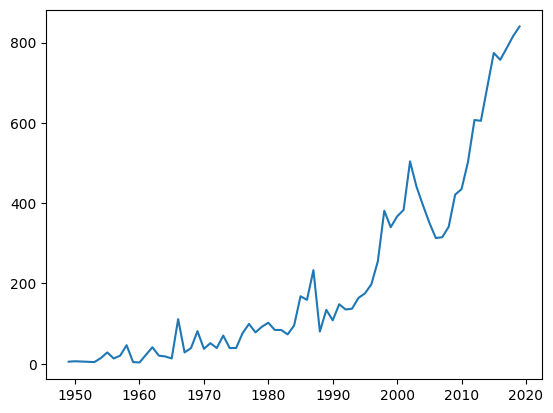

In [16]:
plt.plot(sets_by_year.index, sets_by_year.set_num)
plt.show()

Performa LEGO stabil di 1950 - 1990 an, terus naik banyak di awal 2000 an, sempet turun di sekitaran 2005, tapi sembuh lagi secara kuat pasca itu!


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [17]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})

In [18]:
themes_by_year.rename(columns = {'theme_id': 'total_themes'}, inplace=True)
themes_by_year.tail()

,total_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

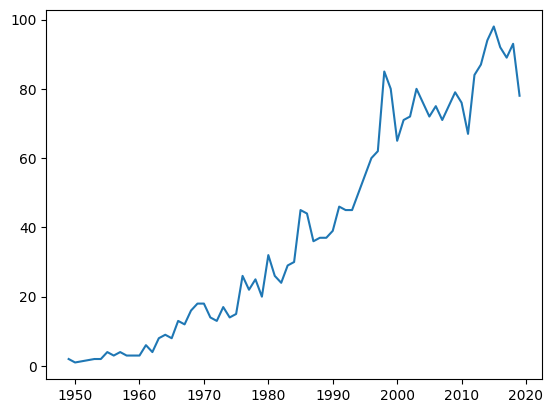

In [19]:
plt.plot(themes_by_year[:-2].index, themes_by_year[:-2]['total_themes'])
plt.show()

Tema yang dirilis LEGO terus konsisten nambah dari 1950 sampai pertengahan 1990-an.

Sementara itu, dari awal 2000-an sampai 10 tahun setelahnya, jumlah tema yang dirilis LEGO sempat stagnan.

### Line Charts with Two Seperate Axes

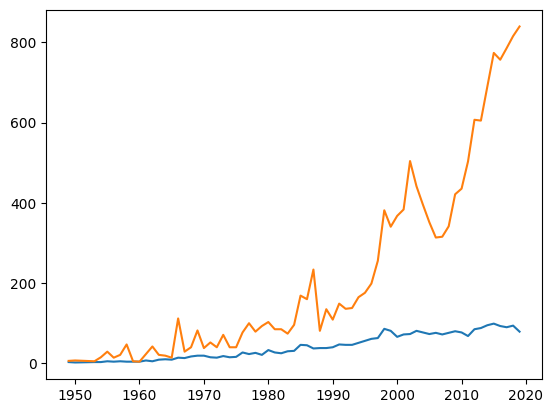

In [20]:
plt.plot(themes_by_year.index[:-2], themes_by_year['total_themes'][:-2])
plt.plot(sets_by_year.index, sets_by_year['set_num'])

Ups, plot di atas ga informatif, soalnya scale nya beda. Jadi, kita sesuaiin dulu. Caranya, kita pakai sumbu y yang beda!

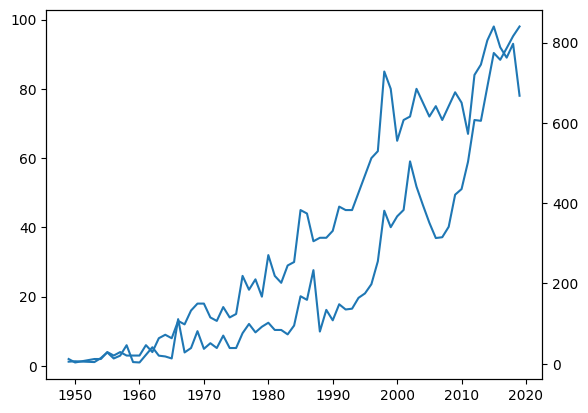

In [21]:
ax1 = plt.gca() # gca = get current axes
ax2 = ax1.twinx() # twinx ini biar bisa share sumbu x yang sama

ax1.plot(themes_by_year.index[:-2], themes_by_year['total_themes'][:-2]) # janlup kaitin ax ke plot nya
ax2.plot(sets_by_year.index, sets_by_year['set_num'])

Ini udah cukup baik, tapi alangkah baiknya kalau kita kasih warna yang beda untuk masing-masing grafik garisnya.

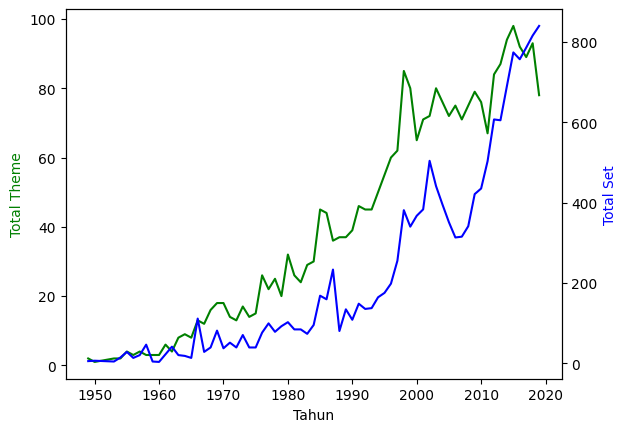

In [22]:
ax1 = plt.gca() # gca = get current axes
ax2 = ax1.twinx() # twinx ini biar bisa share sumbu x yang sama

ax1.plot(themes_by_year.index[:-2], themes_by_year['total_themes'][:-2], color='g') # janlup kaitin ax ke plot nya
ax2.plot(sets_by_year.index, sets_by_year['set_num'], 'b')

ax1.set_xlabel('Tahun')
ax1.set_ylabel('Total Theme', color='green')
ax2.set_ylabel('Total Set', color='blue')

plt.show()

Seiring berjalannya waktu, set LEGO semakin kompleks ga ya dari segi jumlah part per set nya? Kita amati sekarang.

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [23]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})

In [24]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


In [25]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

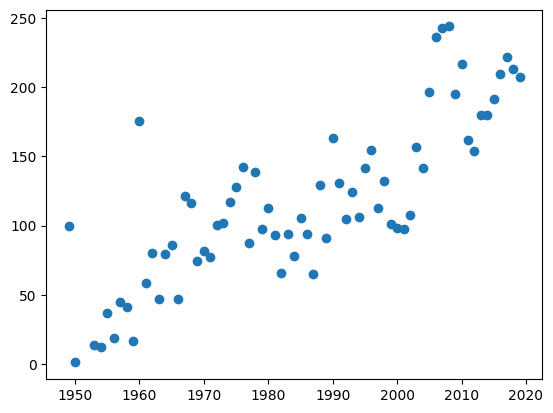

In [26]:
plt.scatter(parts_per_set[:-2].index, parts_per_set[:-2]['num_parts'])

Dari scatter plot ini, terlihat ada upward trend dalam kompleksitas LEGO sets dari tahun ke tahun.

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [27]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count[:5]

,count
theme_id,
158,753
501,656
494,398
435,356
503,329


Oke. Yang paling banyak theme dengan id 158. Tapi, ini theme apa? Buat tau namanya, kita pakai data themes.csv

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src='https://i.imgur.com/Sg4lcjx.png'>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [28]:
themes_df = pd.read_csv('data/themes.csv')

In [29]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [30]:
# cari nama 'Star Wars'
themes_df[themes_df['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


Ada 4 id yang name nya Star Wars

In [31]:
# coba pakai id nya buat liat data sets_df
sets_df[sets_df['theme_id'] == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


Star Wars itu.. udah mengudara lumayan lama. Bisa diliat dari data di atas, kalau theme_id 18 itu edisi LEGO Star Wars di tahun 2000 s.d. 2002.

Buat mastiin lebih lanjut, kita coba cek lagi pakai theme_id lainnya, 209.

In [33]:
sets_df[sets_df['theme_id'] == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


Ternyata theme ini theme kalender, dari tahun 2010 s.d. 2020. Jadi makes sense kalau theme LEGO Star Wars ada lebih dari 1.

### Merging (i.e., Combining) DataFrames based on a Key


Sekarang kita kombinasikan datanya, jadi data yang isinya nama theme, dengan total set per theme-nya. Caranya, pakai .merge()

Tadi, kita udah bikin series baru, namanya set_theme_count. Isinya theme_id sama total set per theme nya. Kita bakal pakai itu. Tapi sebelum itu kita harus ubah dulu ke dataframe biar bisa di-merge.

In [34]:
set_theme_count = pd.DataFrame(
    {
        'id': set_theme_count.index,
        'set_count': set_theme_count.values,
    }
)
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [35]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


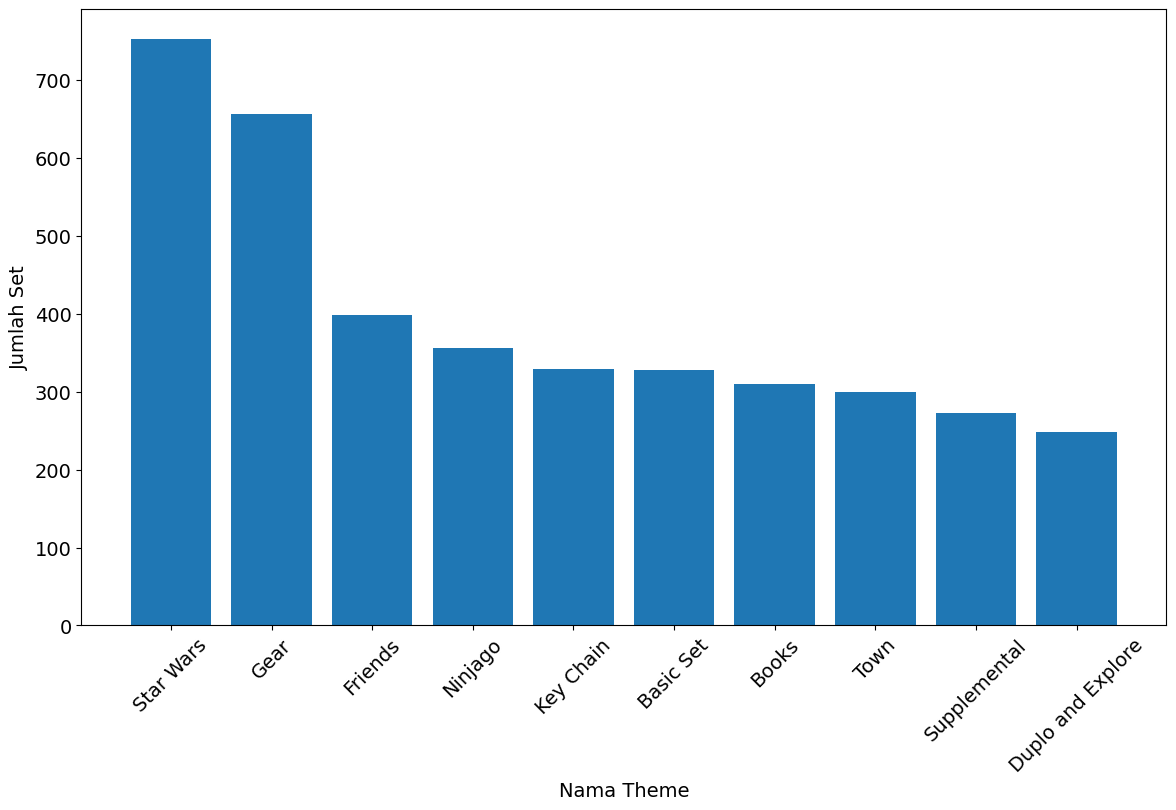

In [37]:
# plot top 10 themes
plt.figure(figsize=(14,8))
plt.bar(merged_df[:10]['name'], merged_df[:10]['set_count'])
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Jumlah Set', fontsize=14)
plt.xlabel('Nama Theme', fontsize=14)

plt.show()